<a href="https://colab.research.google.com/github/noname1711/computer_vision/blob/main/Facial_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import các thư viện
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import dlib
from imutils import face_utils

In [2]:
#kết nối google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#thiết lập đường dẫn
path = '/content/drive/MyDrive/Facial_feature_extraction'
os.listdir(path)

['nhieu_face.jpg',
 'dlib_face_recognition_resnet_model_v1.dat',
 'shape_predictor_68_face_landmarks.dat']

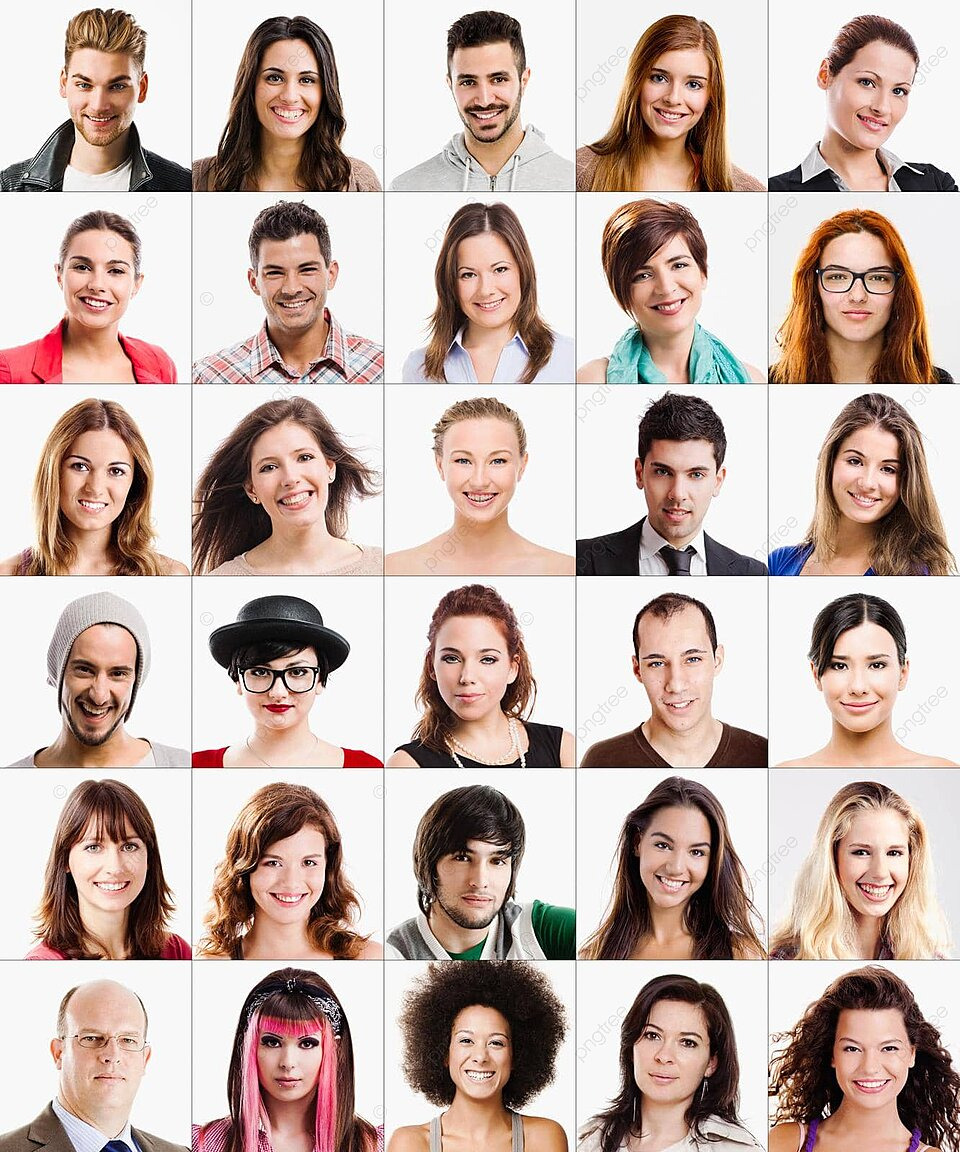

In [4]:
#thử hiển thị một ảnh
img = cv2.imread(path + '/nhieu_face.jpg')
cv2_imshow(img)

0.0202236
0.0335153
0.100681
-0.0788463
-0.085032
0.0142897
-0.026589
-0.131165
0.185515
-0.126212
0.254324
-0.0539224
-0.253361
-0.0438063
-0.0367833
0.189706
-0.140843
-0.161417
-0.0194476
-0.0240507
-0.0109523
-0.0201019
-0.019237
0.0277481
-0.162255
-0.267074
-0.0242993
-0.0667793
0.0731777
-0.0999202
-0.0496481
0.0716233
-0.247061
0.00282894
0.112765
0.0805457
-0.124744
-0.126985
0.207362
0.0345532
-0.247985
-0.114012
0.00398567
0.140063
0.191744
-0.00502603
-0.00613243
-0.120608
0.0941672
-0.243582
0.0532988
0.178684
0.0534472
0.0706341
-0.0135525
-0.129357
-0.0148087
0.143129
-0.251729
-0.0132791
0.0936906
-0.0736722
-0.114938
-0.0348396
0.152675
0.113136
-0.139285
-0.19718
0.214009
-0.198896
-0.0222795
0.119963
-0.0659625
-0.182965
-0.199828
-0.0521097
0.371412
0.104851
-0.123817
-0.000126101
-0.0775483
-0.0274723
0.0461175
0.054602
0.0112891
0.00537488
0.0246192
-0.0202682
0.199784
-0.0458536
0.00142406
0.209489
-0.0841895
-0.0638789
0.000360398
0.0255539
-0.0413978
0.00099237

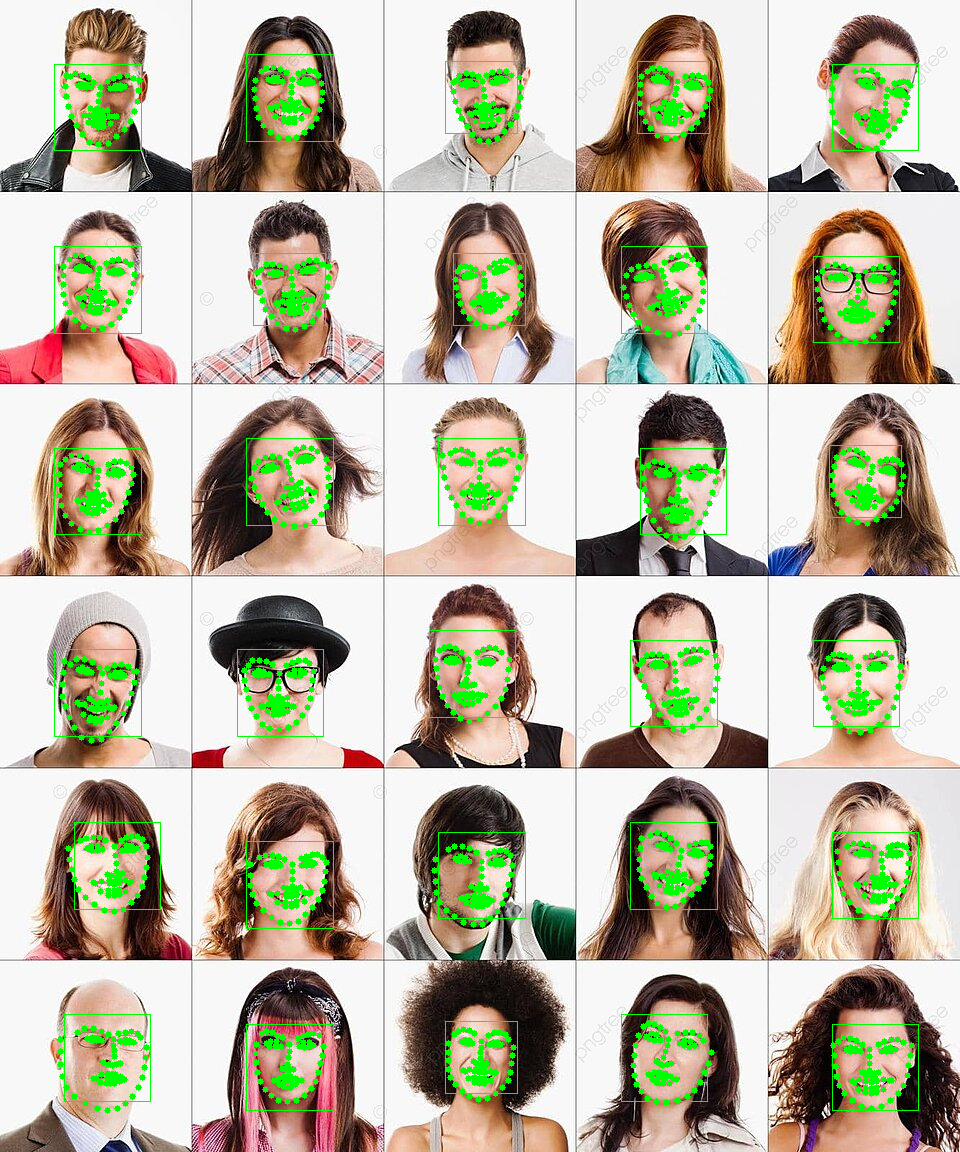

In [10]:
# các đường dẫn đến model
face_landmarks_model_path = "/content/drive/MyDrive/Facial_feature_extraction/shape_predictor_68_face_landmarks.dat"
face_recognition_model_path = "/content/drive/MyDrive/Facial_feature_extraction/dlib_face_recognition_resnet_model_v1.dat"
#đường dẫn đến ảnh
img_path = "/content/drive/MyDrive/Facial_feature_extraction/nhieu_face.jpg"
#tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()
#đọc hình ảnh và phát hiện ra các khuôn mặt
img= cv2.imread(img_path)
#nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)
#vòng lặp qua từng khuôn mặt
for face in faces:
  point_a = face.left(), face.top()
  point_b = face.right(), face.bottom()
  #phát hiện ra các điểm đặc trưng trên khuôn mặt
  shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
  face_shape = shape_predictor(img, face)
  face_shape_array = face_utils.shape_to_np(face_shape)  #mảng chứa các đặc trưng khuôn mặt
  #tính toán đặc trưng của khuôn mặt
  shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
  face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
  print(face_descriptors)
  #đoạn này cần chạy ctr = runtime -> thay đổi loại thời gian chạy -> T4 GPU -> lưu và run lại từ đầu
  #để run lại từ đầu -> thời gian chạy -> khởi động lại phiên và chạy tất cả ô
  # kết quả có thể lên tới 128 con số đặc trưng cho từng đặc trưng khuôn mặt gì đó

  #vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
  cv2.rectangle(img, point_a, point_b, (0, 255, 0))
  #vẽ điểm đặc trưng
  for point in face_shape_array:
      cv2.circle(img, tuple(point), 3, (0,255,0), -1)

cv2_imshow(img)   #alt+enter để run nhanh